# Plotting UMAP results

UMAP is often used for visualization by reducing data to 2-dimensions. Since this is such a common use case the umap package now includes utility routines to make plotting UMAP results simple, and provide a number of ways to view and diagnose the results. Rather than seeking to provide a comprehensive solution that covers all possible plotting needs this umap extension seeks to provide a simple to use interface to make the majority of plotting needs easy, and help provide sensible plotting choices wherever possible. To get started looking at the plotting options let's load a variety of data to work with.

In [1]:
import sklearn.datasets
import pandas as pd
import numpy as np
import umap

In [2]:
pendigits = sklearn.datasets.load_digits()
mnist = sklearn.datasets.fetch_openml('mnist_784')
fmnist = sklearn.datasets.fetch_openml('Fashion-MNIST')

To start we will fit a UMAP model to the pendigits data. This is as simple as running the fit method and assigning the result to a variable.

In [3]:
mapper = umap.UMAP().fit(pendigits.data)

If we want to do plotting we will need the ``umap.plot`` package. While the umap package has a fairly small set of requirements it is worth noting that if you want to using ``umap.plot`` you will need a variety of extra libraries that are not in the default requirements for umap. In particular you will need:

* [matplotlib](https://matplotlib.org/)
* [pandas](https://pandas.pydata.org/)
* [datashader](http://datashader.org/)
* [bokeh](https://bokeh.pydata.org/en/latest/)
* [holoviews](http://holoviews.org/)

All should be either pip or conda installable. With those in hand you can import the ``umap.plot`` package.

In [4]:
import umap.plot

/Users/leland/anaconda3/envs/umap_0.4dev/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/leland/anaconda3/envs/umap_0.4dev/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


Now that we have the package loaded, how do we use it? The most straightforward thing to do is plot the umap results as points. We can achieve this via the function ``umap.plot.points``. In its most basic form you can simply pass the trained UMAP model to ``umap.plot.points``:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


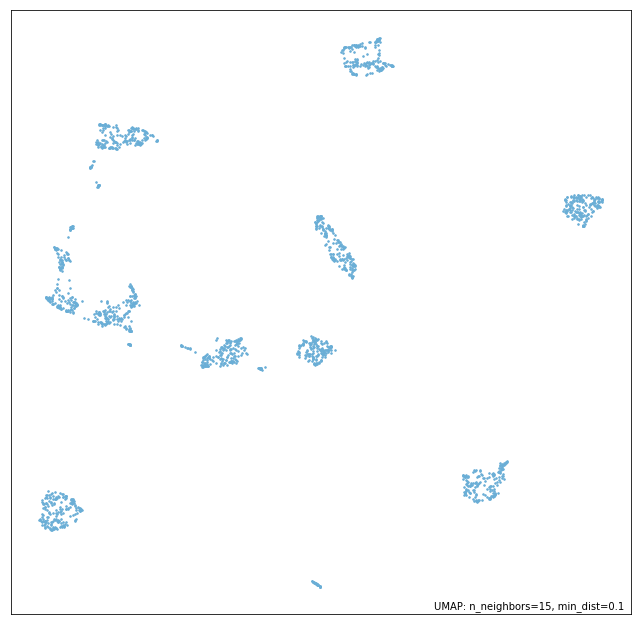

In [5]:
umap.plot.points(mapper)

As you can see we immediately get a scatterplot of the UMAP embedding. Of note the function automatically selects a point-size based on the data density, and watermarks the image with the UMAP parameters that were used (this will include the metric if it is non-standard). The function also returns the matplotlib axes object associated to the plot, so further matplotlib functions, such as adding titles, axis labels etc. can be done by the user of required.

It is common for data passed to UMAP to have an associated set of labels, which may have been derived from ground-thruth, from clustering, or via other means. In such cases it is desirable to be able to color the scatterplot according to the labelling. We can do this by simply passing the array of label information in with the ``labels`` keyword. The ``umap.plot.points`` function will the color the data with a categorical colormap according to the labels provided.

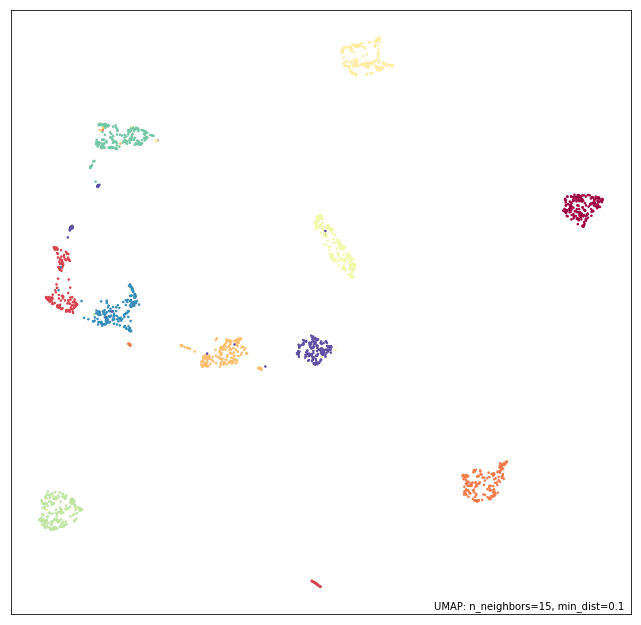

In [6]:
umap.plot.points(mapper, labels=pendigits.target)

Alternatively you may have extra data that is continuous rather than categorical. In this case you will want to use a continuous colormap to shade the data. Again this is straightforward to do -- pass in the continuous data with the ``values`` keyword and data will be colored accordingly using a continuous colormap.

Furthermore, if you don't like the default color choices the ``umap.plot.points`` function offers a number of 'themes' that provide predefined color choices. Themes include:

* fire
* viridis
* inferno
* blue
* red
* green
* darkblue
* darkred
* darkgreen

Here we will make use of the 'fire' theme to demonstrate how simple if is to chance the aesthetics.

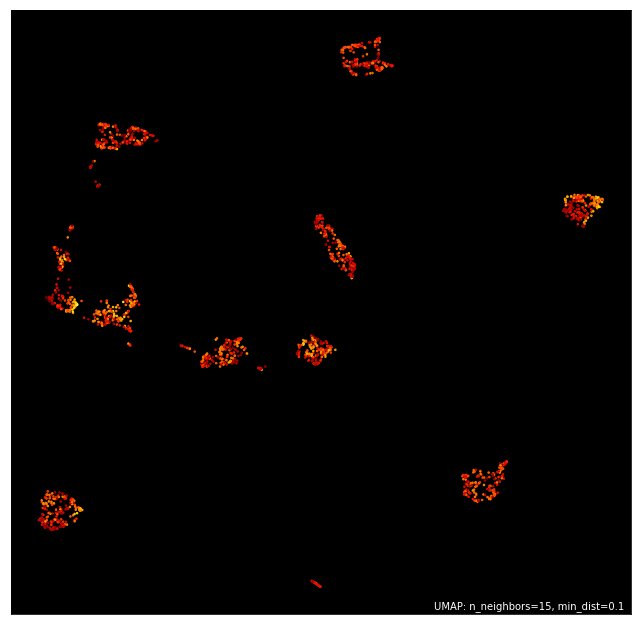

In [7]:
umap.plot.points(mapper, values=pendigits.data.mean(axis=1), theme='fire')

If you want greater control you can specify exact colormaps and background colors. For example here we want to coor the data by label, but use a black background and use the 'Paired' colormap for the categorical coloring (passed as ``color_key_cmap``; the ``cmap`` keyword defines the continuous colormap).

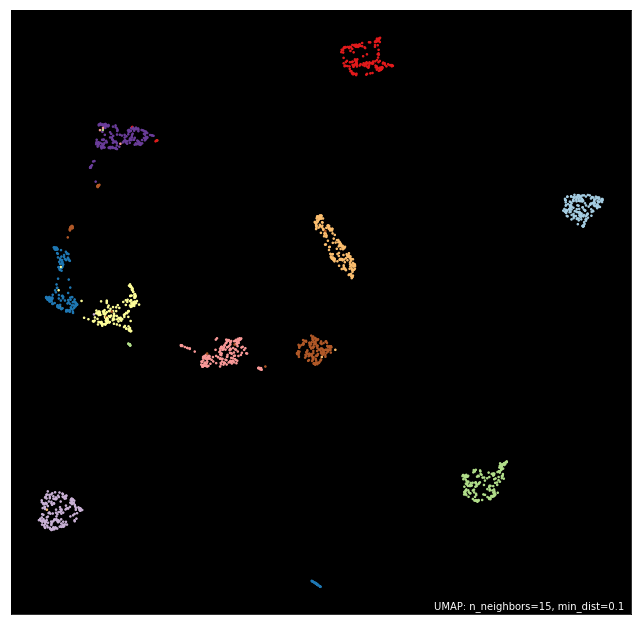

In [8]:
umap.plot.points(mapper, labels=pendigits.target, color_key_cmap='Paired', background='black')

Many more options are available including a ``color_key`` to specify a dictionary mapping of discrete labels to colors, ``cmap`` to specify the continous colormap, or the width and height of the resulting plot. Again, this does not provide comprehensive control of the plot aesthetics, but the goal here is to provide a simple to use interface rather than the ability for the user to fine tune all aspects -- users seeking such control are far better served making use on the individual underlying packages (matplotlib, datashader, and bokeh) by themselves.


## Plotting larger datasets

Once you have a lot of data it becomes easier for a simple scatter plot to lie to you. Most notably overplotting, where markers for points overlap and pile up on top of each other, can deceive you into thinking that extremely dense clumps may only contain a few points. While there are things that can be done to help remedy this, such as reducing the point size, or adding an alpha channel, few are sufficient to be sure the plot isn't subtley lying to you in some way. [This essay]() in the datashader documentation does an excellent job of describing the issues with overplotting, why the obvious solutions are not quite sufficient, and how to get around the problem. To make life easier for users the ``umap.plot`` package will automatically switch to using datashader for rendering once your dataset gets large enough. This help to ensure you don't get fooled by overplotting. We can see this in action by working with one of the larger datasets such as Fashion-MNIST.

In [9]:
mapper = umap.UMAP().fit(fmnist.data)

Having fit the data with UMAP we can call ``umap.plot.points`` exactly as before, but this time, since the data is large enough to have potential overplotting, datashader will be used in the background for rendering. 

/Users/leland/anaconda3/envs/umap_0.4dev/lib/python3.7/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


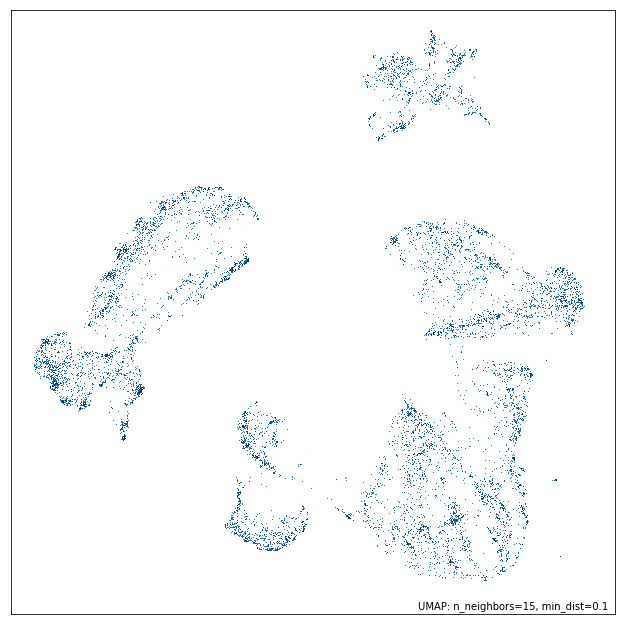

In [10]:
umap.plot.points(mapper)

All the same plot options as before hold, so we can color by labels, and apply the same themes, and it will all seamlessly use datashder for the actual rendering. Thus, regardless of how much data you have ``umap.plot.points`` will render it well with a transparent user interface. You, as a user, don't need to worry about switching to plotting with datashader, or how to convert your plotting to its slightly different API -- you can just use the same API and trust the resuts you get.

/Users/leland/anaconda3/envs/umap_0.4dev/lib/python3.7/site-packages/datashader/utils.py:348: FutureWarning: `Series.cat.categorical` has been deprecated. Use the attributes on 'Series.cat' directly instead.
  ordered=col.cat.categorical.ordered)


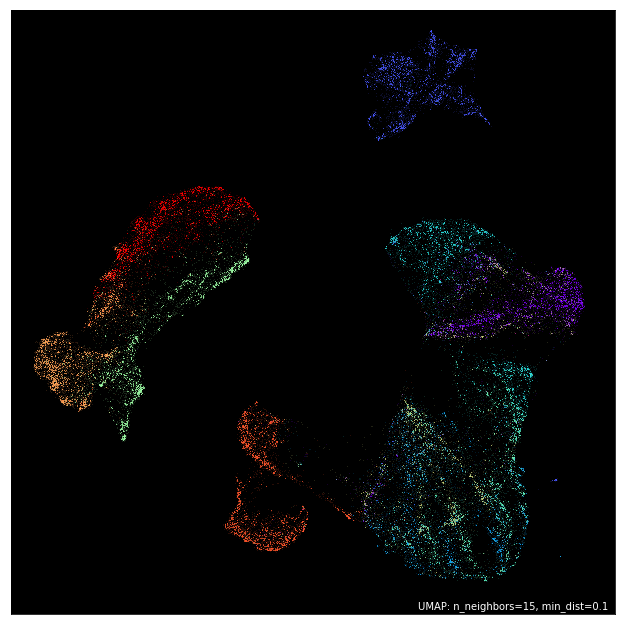

In [11]:
umap.plot.points(mapper, labels=fmnist.target, theme='fire')

## Interactive plotting, and hover tools

Rendering good looking static plots is important, but what if you want to be able to interact with your data -- pan around, and zoom in on the clusters to see the finer structure? What if you want to annotate your data with more complex labels than merely colors? Wouldn't it be good to be able to hover over data points and get more information about the individual point? Since this is a very common use case ``umap.plot`` tries to make it easy to quickly generate such plots, and provide basic utilities to allow you to have annotated hover tools working quickly. Again, the goal is not to provide a comprehensive solution that can do everything, but rather a simple to use and consistent API to get users up and running fast.

To make a good example of this let's use a subset of the Fashion MNIST dataset. We can quickly train a new mapper object on that.

In [12]:
mapper = umap.UMAP().fit(fmnist.data[:30000])

The goal is to be able t hover over different points and see data associated with the given point (or points) under the cursor. For this simple demonstration we'll just use the target information of the point. To create hover information you need to construct a dataframe of all the data you would like to appear in the hover. Each row should correspond to a source data points (appearing in the same order), and the columns can provide whatever extra data you would like to display in the hover tooltip. In this case we'll need a dataframe that can include the index of the point, its target number, and the actual name of the type of fashion item tat target corresponds to. This is easy to quickly put together using pandas.

In [13]:
hover_data = pd.DataFrame({'index':np.arange(30000),
                           'label':fmnist.target[:30000]})
hover_data['item'] = hover_data.label.map(
    {
        '0':'T-shirt/top',
        '1':'Trouser',
        '2':'Pullover',
        '3':'Dress',
        '4':'Coat',
        '5':'Sandal',
        '6':'Shirt',
        '7':'Sneaker',
        '8':'Bag',
        '9':'Ankle Boot',        
    }
)

For interactive use the ``umap.plot`` package makes use of bokeh. Bokeh has several output methods, but in the approach we'll be outputting inline in a notebook. We have to enable this using the ``output_notebook`` function. Alteratively we could use ``output_file`` or other similar options -- see the bokeh documentation for more details.

In [14]:
umap.plot.output_notebook()

Loading BokehJS ...

Now we can make an interactive plot using ``umap.plot.interactive``. This has a very similar API to the ``umap.plot.points`` approach, but also supports a ``hover_data`` keyword which, if passed a suitable dataframe, will provide hover tooltips in the interactive plot. Since bokeh allows different outputs, to display it in the notebook we will have to take the extra stop of calling ``show`` on the result.

In [15]:
p = umap.plot.interactive(mapper, labels=fmnist.target[:30000], hover_data=hover_data, point_size=2)
umap.plot.show(p)

We get the sort of result one would like -- a fully interactive plot that can be zoomed in on, and more, but we also now have an interactive hover tool which presents the data from the dataframe we constructed. This allows a quick and easy method to get up and running with a richer interactive exploration of your UMAP plot. ``umap.plot.interactive`` supports all the same aesthetic parameters as ``umap.plot.points`` so you can theme your plot, color by label or value, and other similar operations explained above for ``umap.plot.points``.

## Plotting connectivity

UMAP works by constructing an intermediate topological representation of the approximate manifold the data may have been sampled from. In practice this structure can be simplified down to a weighted graph. Sometimes it can be beneficial to see how that graph (representing connectivity in the manifold) looks with respect to the resulting embedding. It can be used to better understand the embedding, and for diagnostic purposes. To see the connectivity you can use the ``umap.plot.connectivity`` function. It works very similarly to the ``umap.plot.points`` function, and has the option as to whether to display the embedding point, or just the connectivity. To start let's do a simple plot showing the points:

/Users/leland/anaconda3/envs/umap_0.4dev/lib/python3.7/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/Users/leland/anaconda3/envs/umap_0.4dev/lib/python3.7/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


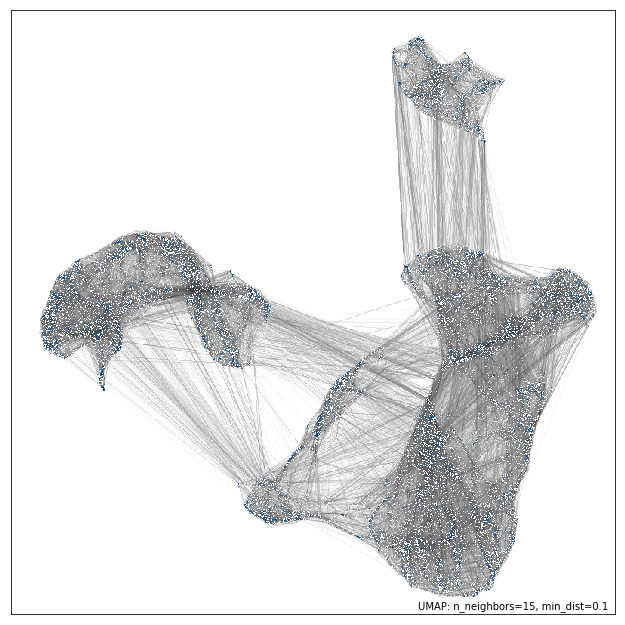

In [16]:
umap.plot.connectivity(mapper, show_points=True)

As with ``umap.plot.points`` there are options to control the basic aesthetics, including theme options and an ``edge_cmap`` keyworkd argument to specify the colormap used for displaying the edges.

Since this approach already leverages datashader for edge plotting, we can go a step further and make use of the edge-bundling options available in datashader. This can provide a less busy view of connectivity, but can be expensive to compute, particularly for larger datasets.

/Users/leland/anaconda3/envs/umap_0.4dev/lib/python3.7/site-packages/umap_learn-0.4.0-py3.7.egg/umap/plot.py:688: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
/Users/leland/anaconda3/envs/umap_0.4dev/lib/python3.7/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


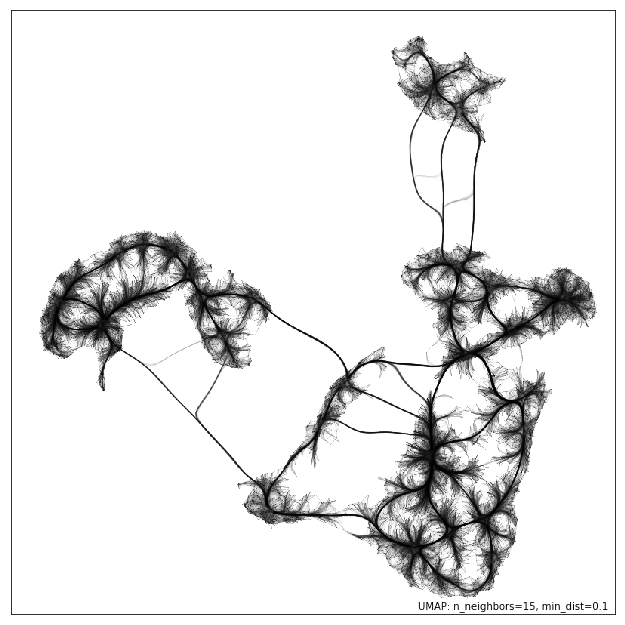

In [17]:
umap.plot.connectivity(mapper, edge_bundling='hammer')

## Diagnostic plotting

Plotting the connectivity provides at least one basic diagnostic view that helps a user understand what is going on with an embedding. More views on data are better, of course, so ``umap.plot`` includes a ``umap.plot.diagnostic`` function that can provide various diagnostic plots. We'll look at a few of them here. To do so we'll use the full MNIST digits data set.

In [18]:
mapper = umap.UMAP().fit(mnist.data)

The first diagnostic type is a Principal Components Analysis based diagnostic, which you can select with ``diagnostic_type='pca'``. The essence of the approach is that we can use PCA, which preserves global structure, to reduce the data to three dimensions. If we scale the results to fit in a 3D cube we can convert the 3D PCA coordinates of each point into an RGB description of a color. By then coloring the points in the UMAP embedding with the colors induced by the PCA it is possible to get a sense of how some of the more large scale global structure has been represented in the embedding.

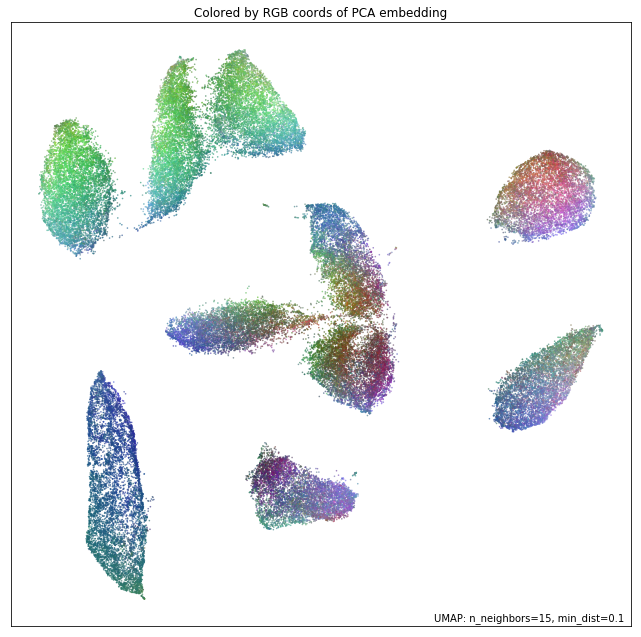

In [19]:
umap.plot.diagnostic(mapper, diagnostic_type='pca')

What we are looking for here is a generally smooth transition of colors, and an overall layout that broadly respects the color transitions. In this case the far left has a bottom cluster that transitions from dark green at the bottom to blue at the top, and this matches well with the cluster in the upper right which have a similar shade of blue at the bottom before transitioning to more cyan and blue. In contast in the right of the plot the lower cluster runs from purplish pink to green from top to bottom, while the cluster above it has its bottom edge more purple than green, suggesting that perhaps one or the other of these clusters has been flipped vertically during the optimization process, and this was never quite corrected.

An alternative, but similar, approach is to use vector quantization as the method to generate a 3D embedding to generate colors. Vector quantization effectively finds 3 representative centers for the data, and then describes each data point in terms of its distance to these centers. Clearly this, again, captures a lot of the broad global structure of the data.

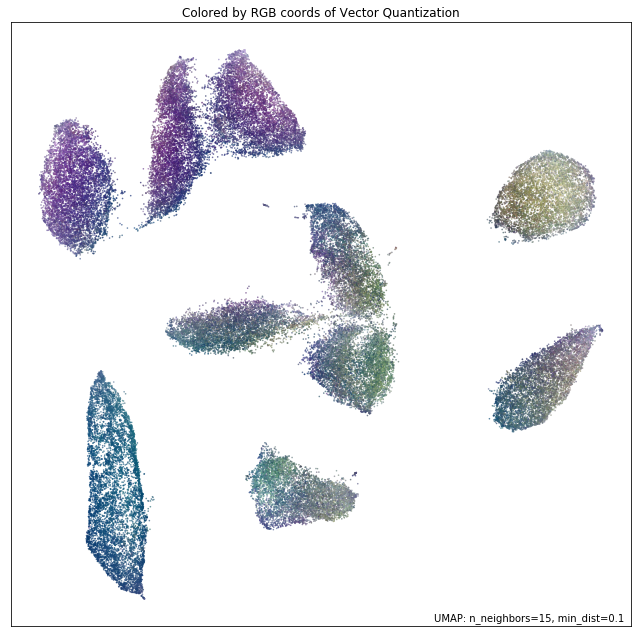

In [20]:
umap.plot.diagnostic(mapper, diagnostic_type='vq')

Again we are looking for largely smooth transitions, and for related colors to match up between clusters. This view supports the fact that the left hand side of the embedding has worked well, but looking at the right hand side it seems clear that it is the upper two of the clusters that has been inadvertently flipped vertically. By contrasting views like this one can get a better sense of how well the embedding is working.

For a different perspective we can look at approximations of the local dimension around each data point. Ideally the local dimension should match the embedding dimension (although this is often a lot to hope for. In practice when the local dimension is high this represents points (or areas of the space) that UMAP will have a harder time embedding as well. Thus one can trust the embedding to be more accurate in regions where the points have consistently lower local dimension.

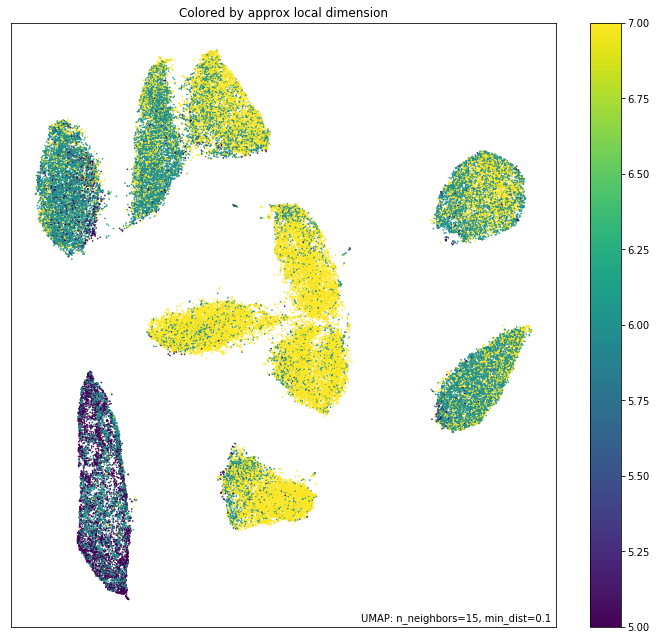

In [21]:
local_dims = umap.plot.diagnostic(mapper, diagnostic_type='local_dim')

As you can, the local dimension of the data varies quite widely across the data. In particular the lower left cluster has the lowest local dimension -- this is actually unsurprising as this is the cluster corresponding to the digits 1: there are relatively few degrees of freedom over how a person draws a number one, and so the resulting local dimension is lower. In contrast the clusters in the middle have a much higher local dimension. We should expect the embedidng to be a little less accurate in these regions: it is hard to represent seven dimensional data well in only two dimensions, and compromises will need to be made.

The final diagnostic we'll look at is how well local neighborhoods are preserved. We can measure this in terms of the Jaccard index of the local neighborhood in the high dimensional space compared to the equivalent neighborhood in the embedding. The Jaccard index is essentially the ratio of the number of neighbors that the two neighborhoods have in common over the total number of unique neighbors across the two neighborhoods. Higher values mean that the local neighborhood has been more accurately preserved.

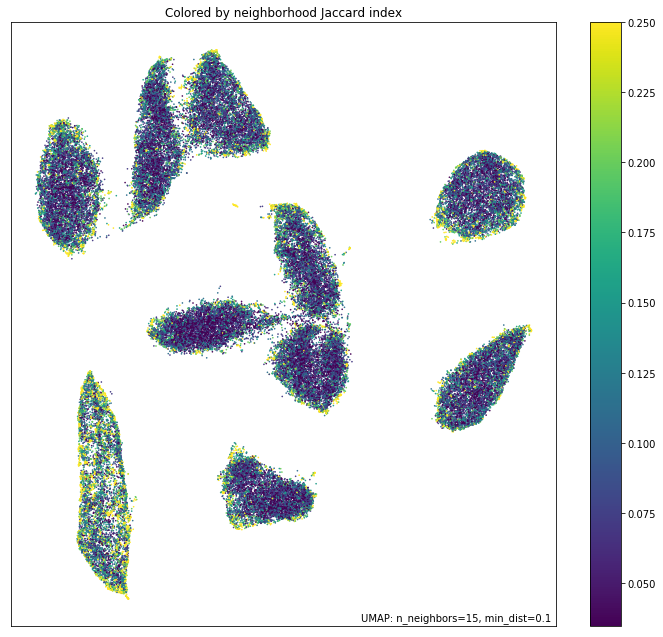

In [22]:
umap.plot.diagnostic(mapper, diagnostic_type='neighborhood')

As one might expect the local neighborhood preservation tends to be a lot better for those points that had a lower local dimension (as seen in the last plot). There is also a tendency for the edges of clusters (where there were clear boundaries to be followed) have a better preservation of neighborhoods than the centers of the clusters that had higher local dimension. Again, this provides a view on which areas of the embedding you can have greater trust in, and which regions had to make compromises to embed into two dimensions.